<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Linear Regression and Object Oriented Programming

Week 3 | 3.1

---

### Deriving the least squares solution to linear regression

With target vector $y$ and prediction matrix $X$, we can formulate a regression as:

### $$ y = \beta X + \epsilon $$

Where $\beta$ is our vector of coefficients and $\epsilon$ is our vector of errors, or residuals.

We can equivalently formulate this as a calculation of the residuals:

### $$ \epsilon = y - \beta X$$

Our goal is to minimize the sum of squared residuals. The sum of squared residuals is equivalent to the dot product of the vector of residuals:

### $$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon' \epsilon
$$

Therefore we can write the sum of squared residuals as:

### $$ \epsilon' \epsilon = (y - \beta X)' (y - \beta X) $$

Which becomes:

### $$ \epsilon' \epsilon = y'y - y'X\beta - \beta' X' y + \beta' X' X \beta $$

Now take the derivative with respect to $\beta$:

### $$ \frac{\partial \epsilon' \epsilon}{\partial \beta} = 
-2X'y + 2X'X\beta$$

We want to minimize the sum of squared errors, and so we set the derivative to zero and solve for the beta coefficient vector:

### $$ 0 = -2X'y + 2X'X\beta \\
X'X\beta = X'y \\
\beta = (X'X)^{-1}X'y$$

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

house = '/Users/kiefer/github-repos/DSI-SF-2/datasets/housing_data/housing-data.csv'
house = pd.read_csv(house)

In [12]:
price = house.price.values
print price[0:5]

[399900 329900 369000 232000 539900]


In [13]:
sqft = house.sqft.values
sqft[0:5]

array([2104, 1600, 2400, 1416, 3000])

In [29]:
Xt = np.array([np.ones(len(sqft)), sqft])
X = Xt.T


### $$ \beta = (X'X)^{-1}X'y$$

In [20]:
Xt = X.T
print X.shape, Xt.shape

(47, 2) (2, 47)


In [19]:
Xt_y = np.dot(Xt, price)
Xt_y

array([  1.59993950e+07,   3.59178290e+10])

In [21]:
XtX = np.dot(Xt, X)
XtX

array([[  4.70000000e+01,   9.40320000e+04],
       [  9.40320000e+04,   2.17179406e+08]])

In [22]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv

array([[  1.59057427e-01,  -6.88669716e-05],
       [ -6.88669716e-05,   3.44217677e-08]])

In [23]:
# just showing this is the identity matrix (or close enough)
np.dot(XtX, XtX_inv)

array([[  1.00000000e+00,  -2.47863016e-19],
       [  1.46014361e-12,   1.00000000e+00]])

In [30]:
betas = np.dot(XtX_inv, Xt_y)

In [33]:
X[0:5]

array([[  1.00000000e+00,   2.10400000e+03],
       [  1.00000000e+00,   1.60000000e+03],
       [  1.00000000e+00,   2.40000000e+03],
       [  1.00000000e+00,   1.41600000e+03],
       [  1.00000000e+00,   3.00000000e+03]])

In [34]:
betas

array([ 71270.49244873,    134.52528772])

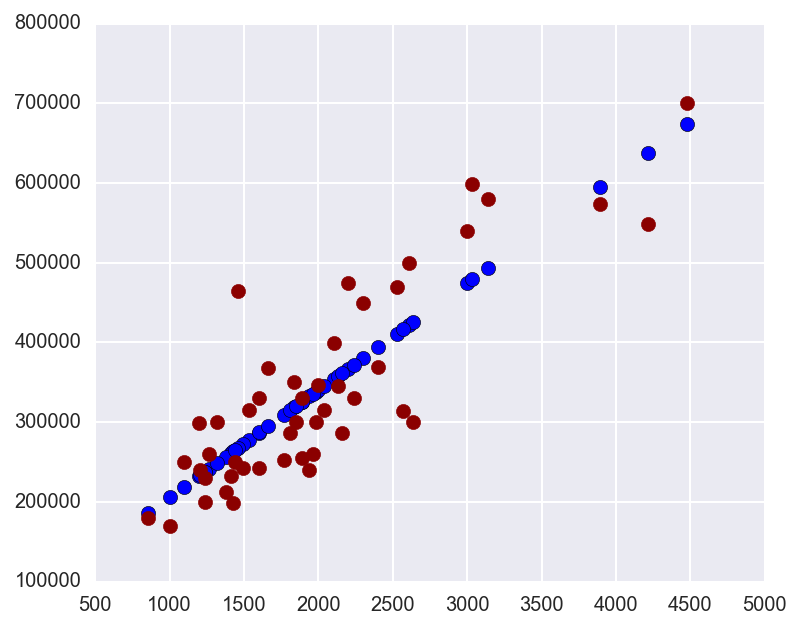

In [37]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(sqft, np.dot(betas, X.T), s=50)
ax.scatter(sqft, price, s=50, color='darkred')
plt.show()

In [35]:
np.dot(betas, X.T) - price

array([ -45588.30218788,  -43389.04719888,   25131.18297731,
         29758.29986059,  -65053.64439055,   38403.18857341,
        -37267.71618842,   64239.07802551,   44915.38950266,
         29751.27230277,   92250.550626  ,   -6678.93211079,
         -4475.71376001,  -26225.26914003,  -18051.44272201,
        -69221.34579472,  -51056.12776055,   37643.74807095,
        -77751.03188916, -119983.36047122,   56076.6758504 ,
         70254.23566454,   44149.053952  ,   75309.10695584,
         20673.86168047,  -30651.69105901, -197091.63805516,
        -57918.63076994, -107773.87456674,  126113.67616701,
        -31237.50343375,   35895.78016897,   30802.07939802,
        -86623.67997287,   28995.78851009,   14683.33090272,
          8047.32393411,   13078.40586828,   89294.58018955,
         75114.16449989,  -73379.42878479,   42438.08636663,
        102596.90602659,  -66299.16228698,    5986.03758637,
         20511.32530662,   -6395.58642382])

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)
print linreg.intercept_, linreg.coef_

0.0 [ 71270.49244873    134.52528772]


---

## Classes and Objects

In python, everything is an "object" of a specific type. This is the basis of what is known as object oriented programming.

A class is a type of object. You can think of a class definition as a sort of "blueprint" that specifies the construction of a new object when instantiated.

Knowing how to define and use classes is esential to programming python at an intermediate or advanced level. I will cover the basics here, which will help you understand how thinks like LinearRegression in sklearn work.



In [74]:
class DumbClass(object):
    
    variable2 = 10
    
    def __init__(self, set_variable=1):
        self.variable = set_variable
        
    def multiply_variable(self, multiplier):
        return multiplier
    
    
class Class2():
    
    def __init__(self, var):
        self.var = var
        print 'hi'
    
    
class DumbChild(DumbClass):
    """
    My documentation for this class.
    
    Functions:
        print_hello
    """
    
    def __init__(self, set_variable=2):
        super(DumbChild, self).__init__(set_variable=set_variable)
        #Class2.__init__(self, 33)
        
        print 'called parents init'
    
    def print_hello(self):
        print self

In [75]:
dc = DumbChild()
#print dc.variable
print dc.print_hello()
tmp = super(DumbClass, dc)

TypeError: object.__init__() takes no parameters

In [53]:
my_dumbclass = DumbClass(set_variable=5)
print my_dumbclass.variable
print my_dumbclass.multiply_variable(10)
print my_dumbclass.print_hello()

5
10


AttributeError: 'DumbClass' object has no attribute 'print_hello'

In [41]:
my_dumbclass.variable = 5
my_dumbclass.variable

5

In [42]:
dumb2 = DumbClass()
print dumb2.variable, my_dumbclass.variable

1 5


In [54]:
var = raw_input('enter something: ')

enter something: hello


In [55]:
var

'hello'

---

### Coding a simple version of `LinearRegression`

By now you are familiar with the `LinearRegression` class in sklearn. We will walk through the re-creation of this class (a simplified version).


### 1. The class definition

Below is the beginning of our class blueprint:

In [2]:
class SimpleLinearRegression(object):
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

What are the components of this?

**`class`**

- The `class` is like `def`, but instead of defining a function it defines a class.

**`object`**

- `object` in the parentheses of the class definition indicate that this class "inherits" from the `object` class. The object class is a very general, very fundamental class in python. Inheritance means that whatever properties and function are part of the `object` class are passed down to our `SimpleLinearRegression` class.

**`def __init__(self)`**

- The `def __init__(self):` is our class's initialization function. This function is called when you instantiate the class by typing `SimpleLinearRegression()`

**`self`**

- `self` is the (confusing) first argument to class definitions. It is a variable that refers to the **current instantiation of the class**. What does this mean? When you instantiate a class and assign it to a variable with `slr = SimpleLinearRegression()`, the `self` argument is now a reference to the current instantiation of the class `slr`. Now, when you use a function that is part of the class, it knows to use that specific object's function. This lets you have multiple instantiations of a class with the same function name.

**class attributes**

- `self.coef_` and `self.intercept_`, likewise, are "attributes" (variables) that are connected to the instantiation of the class. When self becomes `slr`, for example, the `self` becomes `slr` and `self.coef_` becomes `slr.coef`

---

### 2. Adding a class function

Now, just like with `__init__`, we can add functions to the class.

Let's add a `calculate_betas()` method that will calculate the coefficients for a linear regression.

Notice that we assigned `self.coef_` inside of the `calculate_betas()` function.

This will set the class attribute `self.coef_`, and this attribute can be accessed by _any other function in the class without passing it as an argument!_

It can also be accessed by you after instantiating the class.

---

### 3. Assigning attributes during instantiation

There is an issue here - we may pass an `X` matrix in without an intercept. 

Add a keyword argument to the `__init__` function which will specify whether the `X` matrix should have an intercept added or not.

---

### 4. Add a function to add an intercept to the `X` matrix if necessary

This function will be called from inside the `fit` function.

---

### 5. Try out the class...

Let's instantiate the class and try out the coefficient fitting function on the housing data.

---

### 6. Add the `predict` function.

Let's add some more of the class methods that are in the real `LinearRegression` class.

First off add the `predict` function. It will take a design matrix `X` and return predictions for those rows.

---

### 7. Add a `score` method.

This will calculate the $R^2$ of your model on a provided `X` and `y`.

You'll probably need to write a helper function to calculate the sum of squared errors, since this will be run for both the baseline model and the regression model in order to calculate the $R^2$.

Check against sklearn's implementation:

In [3]:
from sklearn.linear_model import LinearRegression

---

### 8. Inspecting a class

When we want to know more about a class object, we can use the "inspect" module. Specifically the `inspect.getmembers()` function takes an instantiated class as an argument and returns an information dictionary.

This can be helpful to know what attributes and methods are avaiable and basically, the blueprint of a class object in memory.  Depending on the way the class was implemented, you can usually find useful information hiding inside of `slr.__class__.__dict__` -- which can be easier to look at.  The "right way" is to use the "inspect" module.

In [4]:
import inspect

---

### Special Class Methods

|Method| Description|
|--|--|
|\_\_init\_\_ ( self [,args...] )| Constructor (with any optional arguments) Sample Call : obj = className(args)
|\_\_del\_\_( self ) | Destructor, deletes an object Sample Call : del obj
|\_\_repr\_\_( self ) | Evaluatable string representation Sample Call : repr(obj)
|\_\_str\_\_( self ) | Printable string representation Sample Call : str(obj)
|\_\_cmp\_\_ ( self, x ) | Object comparison Sample Call : cmp(obj, x)

The `__repr__` function reports back something descriptive about what the class represents.  You can basically do whatever you want with it but the purpose of it is to convey something descirptive about your class.

The `__del__` method is the bookend function of `__init__`. You can use it to run code once your class is done executing.  

Generally it works well but in practice there are a few things watch out for.  Read more about [safely using Python destructors](http://eli.thegreenplace.net/2009/06/12/safely-using-destructors-in-python)